In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = []
june_temps = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['date','precipitation', 'temperature'])
june_df.set_index(june_df['date'], inplace=True)


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe().to_csv("june.csv")
june_df.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


<AxesSubplot:xlabel='date'>

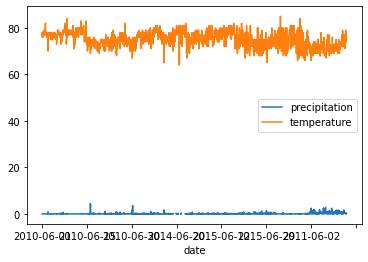

In [8]:
june_df.plot()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

[('2010-12-01', 0.04, 76.0),
 ('2010-12-03', 0.0, 74.0),
 ('2010-12-04', 0.0, 74.0),
 ('2010-12-06', 0.0, 64.0),
 ('2010-12-07', 0.0, 64.0),
 ('2010-12-08', 0.0, 67.0),
 ('2010-12-09', 0.0, 77.0),
 ('2010-12-10', 1.58, 66.0),
 ('2010-12-11', 0.77, 69.0),
 ('2010-12-12', 0.0, 68.0),
 ('2010-12-13', 0.0, 68.0),
 ('2010-12-14', 0.0, 71.0),
 ('2010-12-15', 0.0, 74.0),
 ('2010-12-16', 0.0, 67.0),
 ('2010-12-17', 0.0, 66.0),
 ('2010-12-18', 0.0, 69.0),
 ('2010-12-19', 1.4, 71.0),
 ('2010-12-23', 0.0, 70.0),
 ('2010-12-24', 0.0, 70.0),
 ('2010-12-26', None, 74.0),
 ('2010-12-27', 0.13, 74.0),
 ('2010-12-28', 0.55, 71.0),
 ('2010-12-29', 0.06, 75.0),
 ('2010-12-30', 0.01, 75.0),
 ('2010-12-31', 0.0, 72.0),
 ('2011-12-01', 0.03, 69.0),
 ('2011-12-02', 0.08, 68.0),
 ('2011-12-03', 0.0, 73.0),
 ('2011-12-04', 0.0, 74.0),
 ('2011-12-05', 0.0, 73.0),
 ('2011-12-06', 0.0, 73.0),
 ('2011-12-07', 0.0, 73.0),
 ('2011-12-08', 0.0, 73.0),
 ('2011-12-09', 0.13, 71.0),
 ('2011-12-10', 0.07, 73.0),
 ('2011-

In [10]:
# 7. Convert the December temperatures to a list.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()
print(december_temps)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(december_temps, columns = ['Date', 'December Temps'])
december_temps_df.set_index(december_temps_df['Date'], inplace=True)
print(december_temps_df.to_string(index=False))

      Date  December Temps
2010-12-01            76.0
2010-12-03            74.0
2010-12-04            74.0
2010-12-06            64.0
2010-12-07            64.0
2010-12-08            67.0
2010-12-09            77.0
2010-12-10            66.0
2010-12-11            69.0
2010-12-12            68.0
2010-12-13            68.0
2010-12-14            71.0
2010-12-15            74.0
2010-12-16            67.0
2010-12-17            66.0
2010-12-18            69.0
2010-12-19            71.0
2010-12-23            70.0
2010-12-24            70.0
2010-12-26            74.0
2010-12-27            74.0
2010-12-28            71.0
2010-12-29            75.0
2010-12-30            75.0
2010-12-31            72.0
2011-12-01            69.0
2011-12-02            68.0
2011-12-03            73.0
2011-12-04            74.0
2011-12-05            73.0
2011-12-06            73.0
2011-12-07            73.0
2011-12-08            73.0
2011-12-09            71.0
2011-12-10            73.0
2011-12-11            73.0
2

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# my bday
session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('day',Measurement.date)==2)\
.filter(extract('month',Measurement.date)==12).all()

[('2011-12-02', 0.08, 68.0),
 ('2012-12-02', 0.0, 71.0),
 ('2013-12-02', 2.01, 71.0),
 ('2014-12-02', 0.02, 73.0),
 ('2015-12-02', 0.0, 77.0),
 ('2016-12-02', 0.03, 72.0),
 ('2010-12-02', 0.13, 72.0),
 ('2011-12-02', 0.14, 68.0),
 ('2012-12-02', 0.0, 70.0),
 ('2013-12-02', 0.93, 70.0),
 ('2014-12-02', 0.0, 71.0),
 ('2015-12-02', 0.03, 74.0),
 ('2016-12-02', 0.3, 71.0),
 ('2010-12-02', 0.06, 73.0),
 ('2011-12-02', 0.24, 68.0),
 ('2013-12-02', None, 73.0),
 ('2014-12-02', 0.0, 74.0),
 ('2015-12-02', 0.0, 76.0),
 ('2016-12-02', 0.4, 77.0),
 ('2010-12-02', 0.26, 75.0),
 ('2011-12-02', 0.0, 69.0),
 ('2013-12-02', None, 74.0),
 ('2014-12-02', 0.0, 75.0),
 ('2015-12-02', 0.28, 65.0),
 ('2016-12-02', None, 70.0),
 ('2010-12-02', None, 71.0),
 ('2010-12-02', 0.02, 74.0),
 ('2011-12-02', 0.42, 69.0),
 ('2012-12-02', 0.0, 72.0),
 ('2013-12-02', 2.25, 68.0),
 ('2014-12-02', 0.0, 72.0),
 ('2015-12-02', None, 76.0),
 ('2016-12-02', 0.01, 75.0),
 ('2010-12-02', 0.16, 71.0),
 ('2011-12-02', 0.29, 69.0

In [14]:
# June extra criteria 
moms_bday = []
moms_bday = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('day',Measurement.date)==2)\
.filter(extract('month',Measurement.date)==6).all()

In [15]:
moms_bday_df = pd.DataFrame(moms_bday, columns=['date','precipitation', 'temperature'])
moms_bday_df.set_index(moms_bday_df['date'], inplace=True)

In [16]:
moms_bday_df.describe().to_csv("my_bday.csv")
moms_bday_df.describe()

,precipitation,temperature
count,52.000000,55.000000
mean,0.119423,74.400000
std,0.208208,3.567342
min,0.000000,65.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.112500,76.500000
max,0.810000,81.000000


In [17]:
# December extra crtiteria
my_bday = []
my_bday = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('day',Measurement.date)==2)\
.filter(extract('month',Measurement.date)==12).all()

In [18]:
my_bday_df = pd.DataFrame(my_bday, columns=['date','precipitation', 'temperature'])
my_bday_df.set_index(my_bday_df['date'], inplace=True)

In [19]:
my_bday_df.describe().to_csv("my_bday.csv")
my_bday_df.describe()

,precipitation,temperature
count,47.000000,52.000000
mean,0.321489,71.326923
std,0.583308,3.148116
min,0.000000,62.000000
25%,0.000000,69.000000
50%,0.060000,71.000000
75%,0.295000,74.000000
max,2.250000,77.000000
